In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import requests
from urllib.parse import urlencode

In [2]:
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(14,8)}
        )

–ü—Ä–µ–¥—Å—Ç–∞–≤—å—Ç–µ, —á—Ç–æ –≤—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ –∞–Ω–∞–ª–∏—Ç–∏–∫–æ–º –≤ –∫–æ–º–ø–∞–Ω–∏–∏, –∫–æ—Ç–æ—Ä–∞—è –∑–∞–Ω–∏–º–∞–µ—Ç—Å—è –∞—Ä–µ–Ω–¥–æ–π –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤. –ö–æ–ª–ª–µ–≥–∞ –∏–∑ –æ—Ñ–∏—Å–∞ –≤ –õ–æ–Ω–¥–æ–Ω–µ –ø—Ä–∏—Å–ª–∞–ª –≤–∞–º –¥–∞–Ω–Ω—ã–µ –∑–∞ –¥–≤–∞ –≥–æ–¥–∞: —Å 4 —è–Ω–≤–∞—Ä—è 2015 –ø–æ 3 —è–Ω–≤–∞—Ä—è 2017. –í–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –∏–∑—É—á–∏—Ç—å –¥–∏–Ω–∞–º–∏–∫—É —á–∏—Å–ª–∞ –∞—Ä–µ–Ω–¥, –Ω–∞–ª–∏—á–∏–µ —Å–≤—è–∑–∏ —Å –ø–æ–≥–æ–¥–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏ –∏ –≤—ã—Ö–æ–¥–Ω—ã–º–∏, –∞ —Ç–∞–∫–∂–µ –æ–±—ä—è—Å–Ω–∏—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∞–Ω–æ–º–∞–ª–∏–π –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ.

### –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
timestamp ‚Äì –¥–∞—Ç–∞ –∏ –≤—Ä–µ–º—è (—Ç–æ—á–Ω–æ—Å—Ç—å –¥–æ —á–∞—Å–∞)  
cnt ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∞—Ä–µ–Ω–¥ –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤ –∑–∞ —ç—Ç–æ—Ç —á–∞—Å  
t1 ‚Äì —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞, –≤ –°  
t2 ‚Äì —Ç–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ "–æ—â—É—â–∞–µ—Ç—Å—è –∫–∞–∫", –≤ –°   
hum ‚Äì –≤–ª–∞–∂–Ω–æ—Å—Ç—å (%)  
wind_speed ‚Äì —Å–∫–æ—Ä–æ—Å—Ç—å –≤–µ—Ç—Ä–∞, –∫–º/—á  
weather_code ‚Äì –ø–æ–≥–æ–¥–Ω—ã–µ —É—Å–ª–æ–≤–∏—è:  
1 ‚Äì —è—Å–Ω–æ (SKC)  
2 ‚Äì –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —è—Å–Ω–æ / –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –æ—Ç–¥–µ–ª—å–Ω—ã–µ –æ–±–ª–∞–∫–∞ (SCT)  
3 ‚Äì –æ–±–ª–∞—á–Ω–æ / –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –æ–±–ª–∞–∫–∞ (BKN)  
4 ‚Äì –ø–∞—Å–º—É—Ä–Ω–æ (OVC)  
7 ‚Äì –Ω–µ–±–æ–ª—å—à–æ–π –¥–æ–∂–¥—å Rain/ light Rain shower/ Light rain   
10 ‚Äì –¥–æ–∂–¥—å —Å –≥—Ä–æ–∑–æ–π  
26 ‚Äì —Å–Ω–µ–≥–æ–ø–∞–¥   
94 ‚Äì –ª–µ–¥—è–Ω–æ–π —Ç—É–º–∞–Ω (–¥–∞, —Ç–∞–∫–æ–µ –±—ã–≤–∞–µ—Ç!)  
isholiday ‚Äì —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –¥–µ–Ω—å –ø—Ä–∞–∑–¥–Ω–∏–∫–æ–º (1 ‚Äì –ø—Ä–∞–∑–¥–Ω–∏–∫, 0 ‚Äì –Ω–µ—Ç)  
isweekend ‚Äì  —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –¥–µ–Ω—å –≤—ã—Ö–æ–¥–Ω—ã–º (1 ‚Äì –≤—ã—Ö–æ–¥–Ω–æ–π, 0 ‚Äì –Ω–µ—Ç)  
season ‚Äì –º–µ—Ç–µ–æ—Ä–æ–ª–æ–≥–∏—á–µ—Å–∫–∏–π —Å–µ–∑–æ–Ω (0 ‚Äì –≤–µ—Å–Ω–∞, 1 ‚Äì –ª–µ—Ç–æ, 2 ‚Äì –æ—Å–µ–Ω—å, 3 ‚Äì –∑–∏–º–∞)  

In [3]:
# –°—Å—ã–ª–∫–∞ —Å –¥–∞–Ω–Ω—ã–º–∏ –∞—Ä–µ–Ω–¥—ã –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/c4t6B6OFDANVbg'

# –ü–æ–ª—É—á–∞–µ–º –∑–∞–≥—Ä—É–∑–æ—á–Ω—É—é —Å—Å—ã–ª–∫—É
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [4]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∏–∑ —Å—Å—ã–ª–∫–∏
rent_bicycle = pd.read_csv(download_url, parse_dates=['timestamp'])

In [5]:
rent_bicycle.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1 2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2 2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3 2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4 2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season  
0         0.0         1.0     3.0  
1         0.0         1.0     3.0  
2         0.0         1.0     3.0  
3         0.0         1.0     3.0  
4         0.0         1.0     3.0

In [6]:
# –°–º–æ—Ç—Ä–∏–º —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö
rent_bicycle.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [7]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º –¥–∞–Ω–Ω–Ω—ã–µ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –ø—É—Å—Ç—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
rent_bicycle.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

1. –î–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ –ø–æ –¥–∞—Ç–∞–º –∏ –≤—Ä–µ–º–µ–Ω–∏. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫, –≥–¥–µ:  
–ø–æ –æ—Å–∏ x ‚Äì –¥–∞—Ç–∞ (timestamp)  
–ø–æ –æ—Å–∏ y ‚Äì —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ (cnt)  

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

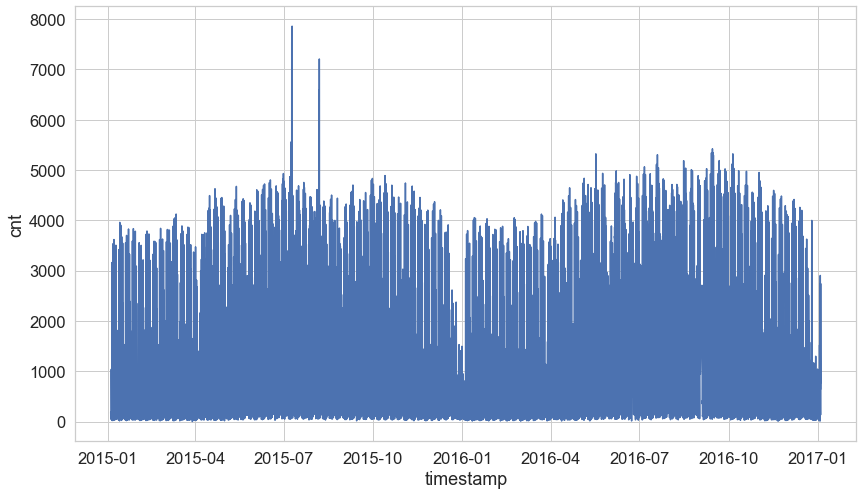

In [8]:
#plt.figure(figsize=(12,8))
sns.lineplot(data=rent_bicycle, x='timestamp', y='cnt')

–° —ç—Ç–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏ –º—ã –ø–æ–ª—É—á–∞–µ–º –Ω–µ—á–∏—Ç–∞–µ–º—ã–π –≥—Ä–∞—Ñ–∏–∫

2. –û—Ç–ª–∏—á–Ω–æ! –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω—É–∂–Ω–æ –Ω–µ–º–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å. –í —ç—Ç–æ–º –Ω–∞–º –ø–æ–º–æ–∂–µ—Ç resample, —Å –∫–æ—Ç–æ—Ä—ã–º –≤—ã –º–æ–≥–ª–∏ —Å—Ç–æ–ª–∫–Ω—É—Ç—å—Å—è –≤ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ç–µ–º–∞—Ö pandas. –≠—Ç–æ—Ç –º–µ—Ç–æ–¥ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –∫ –∫–∞–∫–æ–º—É-–ª–∏–±–æ —Å—Ç–æ–ª–±—Ü—É –¥—Ä—É–≥–æ–π –º–µ—Ç–æ–¥ (–Ω–∞–ø—Ä. sum). –¢–∞–∫ –º–æ–∂–Ω–æ —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∑–∞ –≤–µ—Å—å –¥–µ–Ω—å –∏–ª–∏ –º–µ—Å—è—Ü, –∏–º–µ—è –¥–∞–Ω–Ω—ã–µ —Å —Ç–æ—á–Ω–æ—Å—Ç—å—é –¥–æ –º–∏–Ω—É—Ç.  
–ê–≥—Ä–µ–≥–∏—Ä—É–π—Ç–µ —á–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ –ø–æ –¥–Ω—è–º –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ß—Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ —Å–∫–∞–∑–∞—Ç—å –æ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ?

In [9]:
# –î–ª—è –Ω–∞—á–∞–ª–∞ –æ—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–∞—Ç–µ –∏ —É—Å—Ç–∞–Ω–æ–≤–∏–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∏–Ω–¥–µ–∫—Å–∞
rent_bicycle.sort_values('timestamp',inplace=True)
rent_bicycle.set_index('timestamp', inplace=True)

In [10]:
rent_bicycle

cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                              
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                   ...  ...  ...    ...         ...           ...   
2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-01-04 00:00:00         0.0         1.0     3.0  
2015-01-04 01:00:00         0.0         1.0     3.0  
2015-01-04 02:00:00         0.0         1.0     3.0  
2015-01-04 03:00:00         0.0         1.0     3.0  
2015-01-04 04:00:00         0.0         1.0     3.0  
...                         ...         ...     ...  
2017-01-03 19:00:00         0.0         0.0     3.0  
2017-01-03 20:00:00         0.0         0.0     3.0  
2017-01-03 21:00:00         0.0         0.0     3.0  
2017-01-03 22:00:00         0.0         0.0     3.0  
2017-01-03 23:00:00         0.0         0.0     3.0  

[17414 rows x 9 columns]

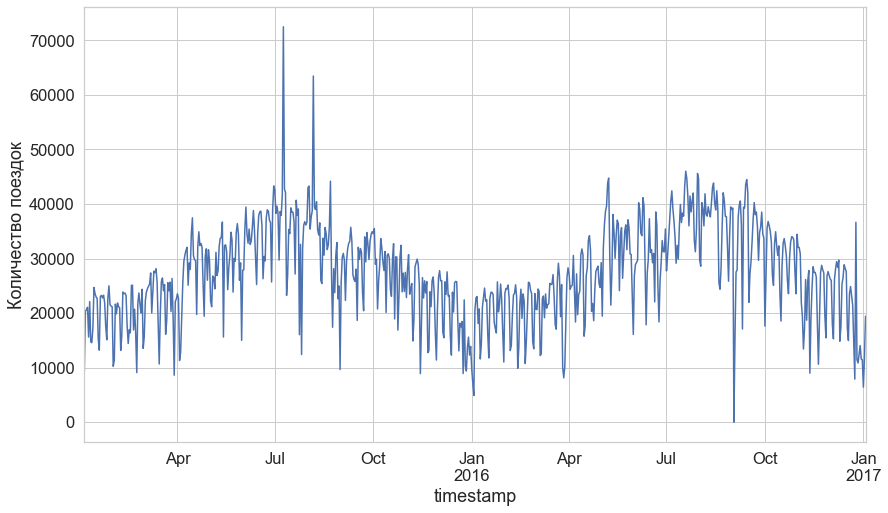

In [11]:
# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ —Å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫')
rent_bicycle.resample(rule='D').cnt.sum().plot()
plt.show()

–ü–æ –¥–∞–Ω–Ω–æ–º—É –≥—Ä–∞—Ñ–∏–∫—É –º—ã –º–æ–∂–µ–º —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —É –∞—Ä–µ–Ω–¥—ã –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤ –µ—Å—Ç—å —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å. –õ–µ—Ç–æ–º –ø–æ–≤—ã—à–∞–µ—Ç—Å—è –∞—Ä–µ–Ω–¥–∞, –∞ –∑–∏–º–æ–π –ø–æ–Ω–∏–∂–∞–µ—Ç—Å—è. –ï—Å—Ç—å –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –ø–∏–∫–∏. –ï—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π, –≥–¥–µ –∞—Ä–µ–Ω–¥–∞ –ø—Ä–µ–≤—ã—à–∞–ª–∞ 60000 –ø–æ–µ–∑–¥–æ–∫. –¢–∞–∫–∂–µ –µ—Å—Ç—å –¥–µ–Ω—å, –∫–æ–≥–¥–∞ –∞—Ä–µ–Ω–¥–∞ –±—ã–ª–∞ —Ä–∞–≤–Ω–∞ 0

3. –ò—Ç–∞–∫, –≤—ã –æ–±–Ω–∞—Ä—É–∂–∏–ª–∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ —Å–∫–∞—á–∫–∏. –î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –∂–µ –º–æ–≥–ª–æ –ø—Ä–æ–∏–∑–æ–π—Ç–∏ –≤ —Ç–æ—Ç –¥–µ–Ω—å ü§î.

–î–ª—è —ç—Ç–æ–≥–æ —Ä–∞–∑–¥–µ–ª–∏–º –¥–∞–ª—å–Ω–µ–π—à–∏–µ –¥–µ–π—Å—Ç–≤–∏—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç—Ç–∞–ø–æ–≤:  

—Å–Ω–∞—á–∞–ª–∞ –ø–æ—Å—á–∏—Ç–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ, —á—Ç–æ–±—ã —Å–≥–ª–∞–¥–∏—Ç—å —Ä—è–¥  
–¥–∞–ª–µ–µ ‚Äì —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –Ω–∞–±–ª—é–¥–∞–µ–º—ã–º–∏ –∏ —Å–≥–ª–∞–∂–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏  
–æ–ø—Ä–µ–¥–µ–ª–∏–º –≤–µ—Ä—Ö–Ω–∏–µ –∏ –Ω–∏–∂–Ω–∏–µ –≥—Ä–∞–Ω–∏—Ü—ã 99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞  
–Ω–∞–π–¥–µ–º –ø—Ä–∏—á–∏–Ω—ã –∞–Ω–æ–º–∞–ª–∏–π!

In [12]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—É –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ —à–∞–≥–∞
rent_per_day = rent_bicycle.resample(rule='D').cnt.sum()
rent_per_day = rent_per_day.reset_index()

In [13]:
rent_per_day.head()

timestamp    cnt
0 2015-01-04   9234
1 2015-01-05  20372
2 2015-01-06  20613
3 2015-01-07  21064
4 2015-01-08  15601

In [14]:
# –°—á–∏—Ç–∞–µ–º —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Å –æ–∫–Ω–æ–º –≤ 3 –¥–Ω—è
roll_rent_per_day = rent_per_day.rolling(window=3).mean()

In [15]:
roll_rent_per_day.head()

cnt
0           NaN
1           NaN
2  16739.666667
3  20683.000000
4  19092.666667

In [16]:
np.std(rent_per_day - roll_rent_per_day).cnt

4558.586641117938

In [17]:
# –†–∞—Å—á–∏—Ç—ã–≤–∞–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ —Ä–∞–∑–Ω–∏—Ü—ã —Å—Ä–µ–¥–Ω–µ–≥–æ –∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ
std = np.std(rent_per_day - roll_rent_per_day).cnt
std

4558.586641117938

In [18]:
roll_rent_per_day.head()

cnt
0           NaN
1           NaN
2  16739.666667
3  20683.000000
4  19092.666667

In [19]:
# –°—á–∏—Ç–∞–µ–º –≤–µ—Ä—Ö–Ω—é—é –∏ –Ω–∏–∂–Ω—é—é –≥—Ä–∞–Ω–∏—Ü—É 99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞
roll_rent_per_day['upper_bound'] = roll_rent_per_day.cnt + std * 2.576 
roll_rent_per_day['lower_bound'] = roll_rent_per_day.cnt - std * 2.576 

In [20]:
roll_rent_per_day.head()

cnt   upper_bound  lower_bound
0           NaN           NaN          NaN
1           NaN           NaN          NaN
2  16739.666667  28482.585854  4996.747479
3  20683.000000  32425.919188  8940.080812
4  19092.666667  30835.585854  7349.747479

In [21]:
# –Ω–∞—Ö–æ–¥–∏–º –¥–∞–Ω–Ω—ã–µ —Å –∞–Ω–æ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã—Ö–æ–¥—è—Ç –∑–∞ —Ä–∞–º–∫–∏ 99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞
anomaly_up = rent_per_day.loc[rent_per_day.cnt > roll_rent_per_day.upper_bound]
anomaly_up

timestamp    cnt
186 2015-07-09  72504
214 2015-08-06  63468
609 2016-09-04  27512
721 2016-12-25  36653

4. –í –∫–∞–∫–æ–π –¥–µ–Ω—å –∑–Ω–∞—á–µ–Ω–∏–µ —á–∏—Å–ª–∞ –∞—Ä–µ–Ω–¥ –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–∞–∏–±–æ–ª—å—à–∏–º?
–ü–æ–¥—É–º–∞–π—Ç–µ, –≤ —á–µ–º –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏—á–∏–Ω–∞ —Å—Ç–æ–ª—å –≤—ã—Å–æ–∫–æ–≥–æ —á–∏—Å–ª–∞ –∞—Ä–µ–Ω–¥ –≤ —ç—Ç–æ—Ç –¥–µ–Ω—å. –î–ª—è —ç—Ç–æ–≥–æ –º–æ–∂–µ—Ç–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —É–∂–µ –∏–º–µ—é—â–∏–µ—Å—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–∞–ª–∏—á–∏–µ –æ—à–∏–±–æ–∫ –≤ –¥–∞–Ω–Ω—ã—Ö (–ø–æ–≤—Ç–æ—Ä—è—é—â–∏—Ö—Å—è —Å—Ç—Ä–æ–∫), –∞ —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø–æ–∏—Å–∫ Google. 

In [22]:
# –°–º–æ—Ç—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –∑–∞ –∫–∞–∂–¥—ã–π —á–∞—Å –≤ —Å–∞–º—ã–π –∞–Ω–æ–º–∞–ª—å–Ω—ã–π –¥–µ–Ω—å
rent_bicycle.loc['2015-07-09']

cnt    t1    t2   hum  wind_speed  weather_code  \
timestamp                                                               
2015-07-09 00:00:00   400  16.0  16.0  55.0        14.0           1.0   
2015-07-09 01:00:00   212  15.5  15.5  59.0        14.0           1.0   
2015-07-09 02:00:00   111  14.0  14.0  67.0        15.0           1.0   
2015-07-09 03:00:00    81  14.0  14.0  63.0        18.5           1.0   
2015-07-09 04:00:00    76  14.0  14.0  63.0        18.0           1.0   
2015-07-09 05:00:00   269  13.0  13.0  67.0        17.0           1.0   
2015-07-09 06:00:00  1724  13.0  13.0  67.0        16.0           1.0   
2015-07-09 07:00:00  5309  13.5  13.5  65.0        17.0           1.0   
2015-07-09 08:00:00  7531  14.5  14.5  61.0        19.0           2.0   
2015-07-09 09:00:00  4832  15.0  15.0  59.0        16.0           2.0   
2015-07-09 10:00:00  2760  16.5  16.5  50.5        10.0           2.0   
2015-07-09 11:00:00  2627  18.0  18.0  43.0         8.5           2.0   
2015-07-09 12:00:00  2778  19.0  19.0  40.5         9.0           1.0   
2015-07-09 13:00:00  3109  19.5  19.5  36.0        11.0           1.0   
2015-07-09 14:00:00  3231  21.0  21.0  34.0        10.0           1.0   
2015-07-09 15:00:00  4076  22.0  21.0  30.0         9.0           1.0   
2015-07-09 16:00:00  6033  23.0  22.0  26.0        11.0           1.0   
2015-07-09 17:00:00  7860  23.0  22.0  27.0        11.0           1.0   
2015-07-09 18:00:00  6913  22.5  21.5  29.0        13.0           1.0   
2015-07-09 19:00:00  4654  22.0  21.0  29.0         7.0           1.0   
2015-07-09 20:00:00  3156  22.0  21.0  32.0         6.5           1.0   
2015-07-09 21:00:00  2179  19.5  19.5  54.5        12.0           1.0   
2015-07-09 22:00:00  1545  18.5  18.5  58.0        16.0           1.0   
2015-07-09 23:00:00  1038  18.0  18.0  60.0        13.0           1.0   

                     is_holiday  is_weekend  season  
timestamp                                            
2015-07-09 00:00:00         0.0         0.0     1.0  
2015-07-09 01:00:00         0.0         0.0     1.0  
2015-07-09 02:00:00         0.0         0.0     1.0  
2015-07-09 03:00:00         0.0         0.0     1.0  
2015-07-09 04:00:00         0.0         0.0     1.0  
2015-07-09 05:00:00         0.0         0.0     1.0  
2015-07-09 06:00:00         0.0         0.0     1.0  
2015-07-09 07:00:00         0.0         0.0     1.0  
2015-07-09 08:00:00         0.0         0.0     1.0  
2015-07-09 09:00:00         0.0         0.0     1.0  
2015-07-09 10:00:00         0.0         0.0     1.0  
2015-07-09 11:00:00         0.0         0.0     1.0  
2015-07-09 12:00:00         0.0         0.0     1.0  
2015-07-09 13:00:00         0.0         0.0     1.0  
2015-07-09 14:00:00         0.0         0.0     1.0  
2015-07-09 15:00:00         0.0         0.0     1.0  
2015-07-09 16:00:00         0.0         0.0     1.0  
2015-07-09 17:00:00         0.0         0.0     1.0  
2015-07-09 18:00:00         0.0         0.0     1.0  
2015-07-09 19:00:00         0.0         0.0     1.0  
2015-07-09 20:00:00         0.0         0.0     1.0  
2015-07-09 21:00:00         0.0         0.0     1.0  
2015-07-09 22:00:00         0.0         0.0     1.0  
2015-07-09 23:00:00         0.0         0.0     1.0

–†–µ–∑–∫–∏–π —Å–∫–∞—á–æ–∫ –∞—Ä–µ–Ω–¥—ã –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å 7 —É—Ç—Ä–∞ –∏ –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç—Å—è –¥–æ 9, –∑–∞—Ç–µ–º —Ç–∞–∫–æ–π –∂–µ —Å–∫–∞—á–æ–∫ –æ–±–Ω–∞—Ä—É–∂–∏–≤–∞–µ—Ç—Å—è —Å 16 –¥–æ 18 —á–∞—Å–æ–≤. –ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø–æ–≥–æ–¥—ã –æ–±—ã—á–Ω—ã–µ, —ç—Ç–æ—Ç –¥–µ–Ω—å –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –≤—ã—Ö–æ–¥–Ω—ã–º –∏–ª–∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–æ–º. –í–µ—Ä–æ—è—Ç–Ω–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ –∫–∞–∫-—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ä–∞–±–æ—á–∏–º –≥—Ä–∞—Ñ–∏–∫–æ–º, –∫–æ–≥–¥–∞ –ª—é–¥–∏ –¥–æ–±–∏—Ä–∞—é—Ç—Å—è –¥–æ —Ä–∞–±–æ—Ç—ã/—É—á–µ–±—ã –∏ –µ–¥—É—Ç –¥–æ–º–æ–π –æ–±—Ä–∞—Ç–Ω–æ

–ï—Å–ª–∏ –º—ã –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –ø–æ–∏—Å–∫–æ–º –Ω–æ–≤–æ—Å—Ç–µ–π –ø–æ –¥–∞–Ω–Ω–æ–π –¥–∞—Ç–µ –≤ –õ–æ–Ω–¥–æ–Ω–µ, —Ç–æ –æ–±–Ω–∞—Ä—É–∂–∏–º, —á—Ç–æ –≤ —Ç–æ—Ç –¥–µ–Ω—å –ø—Ä–æ–∏—Å—Ö–æ–¥–∏–ª–∞ –∑–∞–±–∞—Å—Ç–æ–≤–∫–∞ –≤ –º–µ—Ç—Ä–æ –∏ –ª—é–¥–∏ –Ω–µ –º–æ–≥–ª–∏ –¥–æ–±—Ä–∞—Ç—å—Å—è –¥–æ —Ä–∞–±–æ—Ç—ã —Å –ø–æ–º–æ—â—å—é –ª—é–±–æ–≥–æ –≤–∏–¥–∞ —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∞, –º–µ—Ç—Ä–æ –Ω–µ —Ä–∞–±–æ—Ç–∞–ª–æ, –∞ –Ω–∞ –æ–±—ã—á–Ω–æ–π –¥–æ—Ä–æ–≥–µ –±—ã–ª–∏ —Å–∏–ª—å–Ω–µ–π—à–∏–µ –ø—Ä–æ–±–∫–∏ –∏–∑-–∑–∞ –∑–∞–∫—Ä—ã—Ç–∏—è –º–µ—Ç—Ä–æ. –¢–∞–∫ —á—Ç–æ —á–∞—Å—Ç—å –ª—é–¥–µ–π —Ä–µ—à–∏–ª–æ –¥–æ–±–∏—Ä–∞—Ç—å—Å—è —Å –ø–æ–º–æ—â—å—é –≤–µ–ª–æ—Å–∏–ø–µ–¥–∞ –¥–æ –ø—É–Ω–∫—Ç–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è 

5. –ü—Ä–æ–¥–µ–ª–∞–π—Ç–µ –∞–Ω–∞–ª–æ–≥–∏—á–Ω—É—é –æ–ø–µ—Ä–∞—Ü–∏—é –¥–ª—è –¥–Ω–µ–π, –∫–æ–≥–¥–∞ —á–∏—Å–ª–æ –∞—Ä–µ–Ω–¥ –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–∏–∂–µ –æ–∂–∏–¥–∞–µ–º–æ–≥–æ. –í —á–µ–º –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏—á–∏–Ω–∞ –ø–∞–¥–µ–Ω–∏—è —á–∏—Å–ª–∞ –∞—Ä–µ–Ω–¥ 2016-09-02?

In [23]:
# –†–∞—Å—á–∏—Ç—ã–≤–∞–µ–º –¥–Ω–∏ —Å –∞–Ω–æ–º–∞–ª—å–Ω–æ –Ω–∏–∑–∫–æ–π –∞—Ä–µ–Ω–¥–æ–π –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤
anomaly_down = rent_per_day.loc[rent_per_day.cnt < roll_rent_per_day.lower_bound]
anomaly_down

timestamp    cnt
130 2015-05-14  15609
189 2015-07-12  23240
201 2015-07-24  16034
232 2015-08-24  17400
314 2015-11-14   8898
607 2016-09-02      0
615 2016-09-10  17080
621 2016-09-16  21967
678 2016-11-12   8990

In [24]:
rent_bicycle.loc['2016-09-02']

Empty DataFrame
Columns: [cnt, t1, t2, hum, wind_speed, weather_code, is_holiday, is_weekend, season]
Index: []

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º, –¥–∞–Ω–Ω—ã–µ –∑–∞ —ç—Ç–æ—Ç –¥–µ–Ω—å –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç, –µ—Å–ª–∏ –±—ã –±—ã–ª–∞ –Ω—É–ª–µ–≤–∞—è –∞—Ä–µ–Ω–¥–∞, —Ç–æ–≥–¥–∞ –±—ã–ª–∏ –¥–∞–Ω–Ω—ã–µ –∑–∞ –∫–∞–∂–¥—ã–π —á–∞—Å –≥–¥–µ —Å—Ç–æ–ª–±–µ—Ü cnt –±—ã–ª –±—ã —Ä–∞–≤–µ–Ω 0. –¢–∞–∫ –∫–∞–∫ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç, –º—ã –º–æ–∂–µ–º —Å–∫–∞–∑–∞—Ç—å –æ–± –æ—à–∏–±–∫–∏ –∑–∞–ø–∏—Å–∏ –¥–∞–Ω–Ω—ã—Ö, –∏–∑-–∑–∞ –∫–æ—Ç–æ—Ä—ã—Ö —ç—Ç–æ—Ç –¥–µ–Ω—å –æ—Ç—Å—Ç—É—Ç—Å—Ç–≤—É–µ—Ç –≤ –¥–∞–Ω–Ω–æ–π —Ç–∞–±–ª–∏—Ü–µ